In [7]:
import pandas as pd
from matplotlib import pyplot as plt

from myutils.matplotlib import set_nice_theme

set_nice_theme()

In [8]:
principal_components = pd.read_csv('../data/principal_components.csv', parse_dates=['date']).set_index('date')
principal_components.head(2)

,006А-Купе,006А-СВ,752А-C2,754А-C2,756А-C2,760А-B2,760А-C1,760А-C2,768А-B2,768А-C2,...,776А-B2,776А-C1,776А-C2,778А-B1,778А-B2,778А-C1,778А-C2,780А-B2,780А-C1,780А-C2
date,,,,,,,,,,,,,,,,,,,,,
2021-04-03,-0.696926,0.260097,-0.648852,-0.287191,-0.135927,-0.548157,-0.257623,-0.408713,0.446652,0.681834,...,0.527889,0.082861,0.003751,0.990761,1.070194,0.408045,0.762861,1.246242,0.509162,0.377279
2021-04-04,-0.162728,-0.432478,0.496765,0.638192,0.852867,-0.548157,-1.071763,0.709480,0.497117,0.358099,...,-0.710922,0.016329,NaN,0.055881,1.302059,0.379195,-0.194158,-0.768528,0.591055,NaN


In [27]:
from typing import Union

In [49]:
def significant_corr(ar: Union[np.ndarray, pd.DataFrame], alpha: float = 0.05) -> Union[np.ndarray, pd.DataFrame]:
    if isinstance(ar, pd.DataFrame):
        columns = ar.columns
        ar = ar.values
    else:
        columns = None

    corr = pd.DataFrame(ar).corr().values

    nval = np.isnan(ar).astype(int)
    nval = nval.T.dot(nval)
    quantile = stats.t.ppf(1 - alpha / 2, df=nval - 2)
    critical = quantile / np.sqrt(nval - 2 + quantile ** 2)

    corr[np.abs(corr) < critical] = np.nan

    if columns is not None:
        corr = pd.DataFrame(corr, index=columns, columns=columns)

    return corr


In [50]:
import seaborn as sns

<AxesSubplot:>

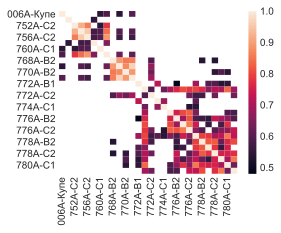

In [51]:
sns.heatmap(significant_corr(principal_components))

In [12]:
import numpy as np

In [20]:
ar = principal_components.copy()

In [21]:
if isinstance(ar, pd.DataFrame):
    columns = ar.columns
    ar = ar.values
else:
    columns = None
    
columns

Index(['006А-Купе', '006А-СВ', '752А-C2', '754А-C2', '756А-C2', '760А-B2',
       '760А-C1', '760А-C2', '768А-B2', '768А-C2', '770А-B2', '770А-C2',
       '772А-B1', '772А-B2', '772А-C2', '774А-B1', '774А-C1', '776А-B1',
       '776А-B2', '776А-C1', '776А-C2', '778А-B1', '778А-B2', '778А-C1',
       '778А-C2', '780А-B2', '780А-C1', '780А-C2'],
      dtype='object')

In [22]:
corr = np.corrcoef(ar)

nval = np.isnan(ar).astype(int)
nval = nval.T.dot(nval)

In [24]:
from scipy import stats

In [4]:
ts = principal_components.iloc[:, 0]
ts.head(10)

date
2021-04-03   -0.696926
2021-04-04   -0.162728
2021-04-05         NaN
2021-04-06    0.680316
2021-04-07    0.143991
2021-04-08   -0.324368
2021-04-09   -0.327835
2021-04-10    0.652021
2021-04-11    0.119272
2021-04-12         NaN
Name: 006А-Купе, dtype: float64

In [5]:
def acfunc(ts: pd.Series, minlag: int = 2, maxlag: int = 14, method: str = 'pearson') -> pd.Series:
    acf = pd.DataFrame({i: ts.shift(-i) for i in range(minlag, maxlag + 1)}).corrwith(ts, method=method)
    acf.index.name = 'lag'
    
    return acf

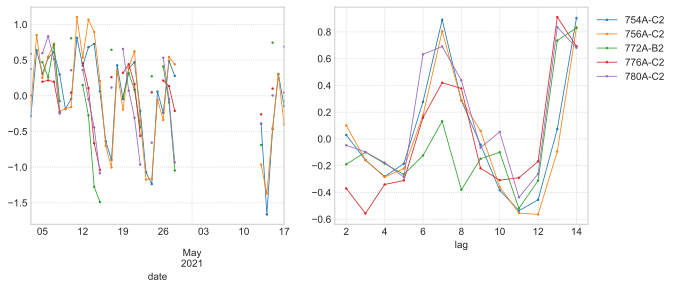

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

for col in principal_components.columns:
    ts = principal_components[col]
    acf = acfunc(ts)
    
    if acf.abs().max() >= 0.8:
        ts.plot(ax=ax1)
        acf.plot(ax=ax2, label=col)

ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))